# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin1")
print(df.head())


   SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1                12   
2   3                     1                12   
3   4                     1                12   
4   5                     1                12   

                                           Questions  Weightage 1  \
0  How much of the syllabus was covered in the cl...            0   
1  How well did the teachers prepare for the clas...            0   
2    How well were the teachers able to communicate?            0   
3  The teachers approach to teaching can best be...            0   
4  Fairness of the internal evaluation process by...            0   

   Weightage 2  Weightage 3  Weightage 4  Weightage 5 Average/ Percentage  \
0            0            1            0            0        3.00 / 60.00   
1            0            0            0            1       5.00 / 100.00   
2            0            0            0            1      

In [4]:
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [9]:
df.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

# Handling Missing values

In [5]:
df.isnull().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

# Statistics

In [15]:
df.describe

<bound method NDFrame.describe of      SN  Total Feedback Given  Total Configured  \
0     1                     1                12   
1     2                     1                12   
2     3                     1                12   
3     4                     1                12   
4     5                     1                12   
..   ..                   ...               ...   
575  16                     9               170   
576  17                     9               170   
577  18                     9               170   
578  19                     9               170   
579  20                     9               170   

                                             Questions  Weightage 1  \
0    How much of the syllabus was covered in the cl...            0   
1    How well did the teachers prepare for the clas...            0   
2      How well were the teachers able to communicate?            0   
3    The teachers approach to teaching can best be...            0  

# Sentiment Analysis

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["Questions"].astype(str).apply(lambda x: analyzer.polarity_scores(x)["compound"])
df["sentiment"] = df["sentiment_score"].apply(lambda x: "Positive" if x>0.05 else ("Negative" if x<-0.05 else "Neutral"))

print(df["sentiment"].value_counts())


sentiment
Positive    348
Neutral     232
Name: count, dtype: int64


# Data Visualization

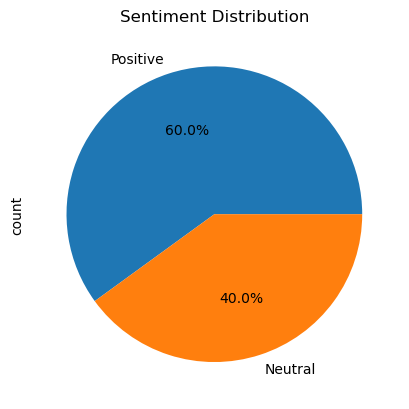

In [18]:
# Pie chart
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Sentiment Distribution")
plt.show()

# Features engineering

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Questions"])
y = df["sentiment"]


# Build the Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        49
    Positive       1.00      1.00      1.00        67

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [41]:
print("Intercept values(b):", model.intercept_)

Intercept values(b): [0.4473967]


In [48]:
print("Slope values(m):", model.coef_)

Slope values(m): [[ 1.76113015  0.61744768  0.9412175  -1.23850553  0.8264351  -1.04801667
  -1.51811214  0.8264351  -0.76778815  0.67028333 -1.50045709  1.07639621
   0.64301723  1.37270705 -0.84650446 -1.23850553  0.52622492 -0.84650446
  -1.50045709  0.8264351   1.07639621 -1.51811214 -1.04801667  0.52622492
   0.455177    0.64301723  0.455177    1.3365146   0.52622492 -0.76778815
  -1.52259902 -1.23850553  0.61744768 -0.84650446 -0.76778815 -0.76778815
   0.9412175   0.64301723 -1.52259902  0.61744768 -1.04801667  0.94038605
   0.71201064  0.64301723  0.75077345 -0.98262044  1.17856789 -1.23850553
   0.52622492  0.455177   -0.84650446  0.81764698  1.37047619 -1.52259902
   0.61744768 -0.98262044  0.71201064 -0.60956759  0.67028333  0.455177
   0.455177    0.52622492 -1.04801667  0.64301723 -0.76778815 -0.76778815
   0.52622492 -0.98262044  0.71201064 -1.04801667  1.10259979 -1.69300892
   0.94038605  0.75077345  0.9412175  -0.76778815 -0.98262044 -1.51811214
   1.07639621 -0.767788

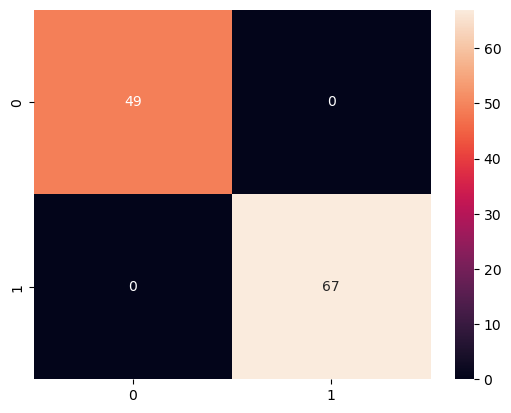

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()
